# Black–Scholes Option Pricing Model

**Context**

This project implements the Black–Scholes–Merton model, a cornerstone of modern financial mathematics, used to price European call and put options.
It models how the fair price of an option depends on factors such as the current stock price, strike price, time to expiry, volatility, and the risk-free interest rate.

The model assumes:
- The underlying asset follows geometric Brownian motion with constant drift and volatility.
- Markets are frictionless (no transaction costs, short selling allowed).
- The risk-free rate and volatility are constant over the option’s life.
- There are no arbitrage opportunities.

**Theory**

The Black–Scholes formula for a European call option 𝐶 and put option 𝑃 is:

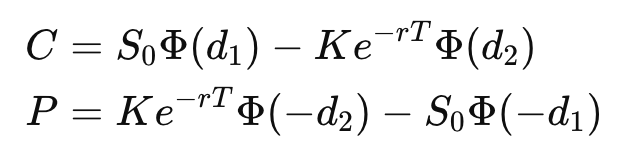

where:

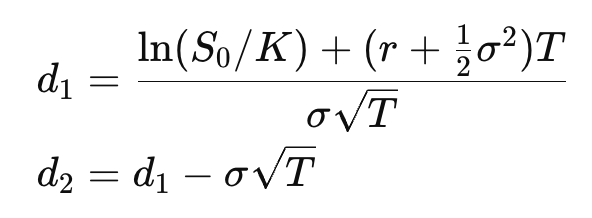

- S0: curret price of underlying asset
- K: strike price
- r: risk-free interest rate
- σ: volatility of the asset
- T: time to expiry (in years)
- Φ: cumulative distribution function of the standard normal distribution

The model derives from solving the Black–Scholes partial differential equation, which enforces the no-arbitrage condition between the option and a continuously rebalanced hedging portfolio.


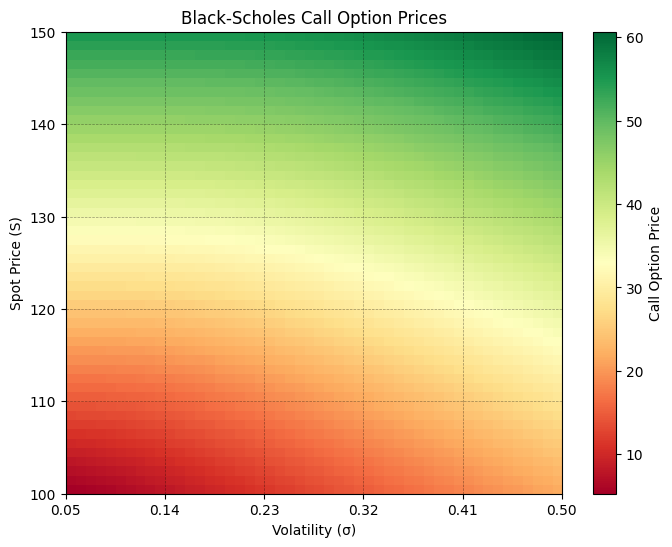

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes function
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call, put

# Fixed parameters
K = 100     # strike price
T = 1       # 1 year
r = 0.05    # 5% risk-free rate

# Parameter ranges
spot_prices = np.linspace(100, 150, 50)   # from $50 to $150
vols = np.linspace(0.05, 0.5, 50)        # 5% to 50% volatility

# Create a grid
call_prices = np.zeros((len(spot_prices), len(vols)))
put_prices = np.zeros((len(spot_prices), len(vols)))

for i, S in enumerate(spot_prices):
    for j, sigma in enumerate(vols):
        call, put = black_scholes(S, K, T, r, sigma)
        call_prices[i, j] = call
        put_prices[i, j] = put

# Plot heatmap for CALL prices
plt.figure(figsize=(8,6))
plt.imshow(call_prices, extent=[vols.min(), vols.max(), spot_prices.min(), spot_prices.max()],
           origin='lower', aspect='auto', cmap='RdYlGn')
plt.colorbar(label="Call Option Price")
plt.xlabel("Volatility (σ)")
plt.ylabel("Spot Price (S)")
plt.title("Black-Scholes Call Option Prices")

plt.grid(True, color='black', linestyle='--', linewidth=0.5, alpha=0.4)

# Set ticks to create clear grid boxes
plt.xticks(np.round(np.linspace(vols.min(), vols.max(), 6), 2))
plt.yticks(np.round(np.linspace(spot_prices.min(), spot_prices.max(), 6), 0))

plt.show()


In this notebook, the model is coded in Python using NumPy and SciPy for vectorized computation and statistical functions.
We generate a range of spot prices and volatility values to visualize how call option prices behave across different market conditions.
The resulting heatmap illustrates the sensitivity of option value to volatility (σ) and spot price (S).

**My main takeaways**

I built this model to strengthen my quantitative finance and mathematical modeling skills after interviewing with a trading firm.
Recreating the Black–Scholes model from scratch was valuable practice because it:

- Bridges theoretical finance with computational implementation.
- Reinforces understanding of stochastic processes and risk-neutral valuation.
- Builds intuition for how volatility, time, and price jointly affect option value, core to any derivatives or trading analysis.

**Next step**

The model could be extended by incorporating option Greeks (Delta, Gamma, Vega, Theta, Rho) to analyze risk exposure or by using Monte Carlo simulations to handle more complex, real-world scenarios beyond the model’s analytical limits. This project strengthens quantitative finance intuition and demonstrates practical application of mathematical models through code.